In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [7]:
df = pd.read_csv('D:/Academics/AI/Simplilearn/Data Sets/CampusX/MNIST/Train.csv')

In [8]:
df.shape

(60000, 785)

In [9]:
df.sample()

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
57214      0    0    0    0    0    0    0    0    0    0  ...      0      0   

       28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
57214      0      0      0      0      0      0      0      0  

[1 rows x 785 columns]

In [10]:
import matplotlib.pyplot as plt

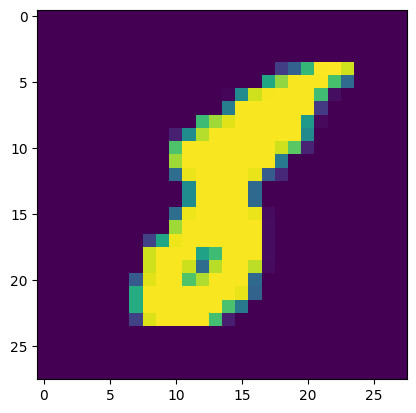

In [11]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [12]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train.shape

(48000, 784)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier()

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

39.80037808418274


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9715

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [23]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [24]:
X_train_trf.shape

(48000, 200)

In [25]:
knn = KNeighborsClassifier()

In [26]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn.predict(X_test_trf)

In [28]:
accuracy_score(y_test,y_pred)

0.95425

In [29]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))
    

0.262
0.31633333333333336
0.5070833333333333
0.6636666666666666
0.7406666666666667
0.82525
0.8381666666666666
0.8724166666666666
0.88475
0.909
0.9158333333333334
0.9191666666666667
0.92825
0.93625
0.9400833333333334
0.9419166666666666
0.9430833333333334
0.9444166666666667
0.94675
0.9504166666666667
0.9491666666666667
0.9501666666666667
0.9518333333333333
0.9523333333333334
0.9535
0.9531666666666667
0.95375
0.9555
0.9553333333333334
0.9565
0.9579166666666666
0.9569166666666666
0.9576666666666667
0.9575833333333333
0.958
0.9571666666666667
0.9575
0.9575833333333333
0.9590833333333333
0.95775
0.9584166666666667
0.9578333333333333
0.9578333333333333
0.958
0.95875
0.9595
0.9578333333333333
0.95875
0.9595
0.95975
0.96
0.95925
0.9595
0.959
0.9601666666666666
0.9594166666666667
0.9593333333333334
0.9591666666666666
0.959
0.9603333333333334
0.9596666666666667
0.9595833333333333
0.9581666666666667
0.9588333333333333
0.9588333333333333
0.9593333333333334
0.9594166666666667
0.9588333333333333
0.96

KeyboardInterrupt: 

In [30]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [31]:
X_train_trf

array([[ -0.04295616,  -1.91883482],
       [  8.15954001,  -4.49571155],
       [ -7.50477405,  -3.72241606],
       ...,
       [ 10.27730794,  -9.28652897],
       [ 10.29732258, -12.41369485],
       [ -2.87750048,  -0.81068841]])

In [32]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [33]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [34]:
X_train_trf

array([[ -0.04282682,  -1.92240168,  -2.50179777],
       [  8.15957907,  -4.49617068,  -4.74157296],
       [ -7.50488861,  -3.71907701,   5.13648975],
       ...,
       [ 10.27731567,  -9.28647868,  -1.82564072],
       [ 10.29728314, -12.41272929,   3.29464454],
       [ -2.87743178,  -0.81218311,  -1.44719361]])

In [35]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [36]:
pca.explained_variance_
# Eigen values

array([40.65780534, 29.35286733, 26.7254231 ])

In [37]:
pca.components_.shape
# Eigen vectors

(3, 784)

In [38]:
pca.explained_variance_ratio_

array([0.05702238, 0.04116726, 0.03748228])

In [39]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [40]:
pca.explained_variance_.shape

(784,)

In [41]:
pca.components_.shape

(784, 784)

In [42]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05702238, 0.09818964, 0.13567192, 0.16469803, 0.18997512,
       0.21201816, 0.23145483, 0.24899896, 0.26449107, 0.27857721,
       0.29203612, 0.30418912, 0.31541422, 0.32643714, 0.33677905,
       0.34679973, 0.35628657, 0.36553212, 0.37450139, 0.3832566 ,
       0.39165487, 0.39977906, 0.40746453, 0.41493226, 0.42213525,
       0.42907204, 0.43594926, 0.44259091, 0.44892842, 0.45509787,
       0.46114434, 0.46706145, 0.47279214, 0.47848895, 0.48409704,
       0.48949156, 0.4948431 , 0.50008162, 0.50521951, 0.51006006,
       0.51486238, 0.51961237, 0.52422734, 0.52876164, 0.5332432 ,
       0.53769768, 0.54208869, 0.54644584, 0.55075226, 0.55491002,
       0.55903357, 0.56310875, 0.56711141, 0.57106149, 0.57495932,
       0.57881571, 0.58255742, 0.58627309, 0.58991977, 0.59351945,
       0.59709068, 0.60059041, 0.60404334, 0.60748518, 0.61090121,
       0.61426725, 0.61761329, 0.62090554, 0.62413045, 0.62730982,
       0.63046295, 0.63359184, 0.63668903, 0.6397278 , 0.64275

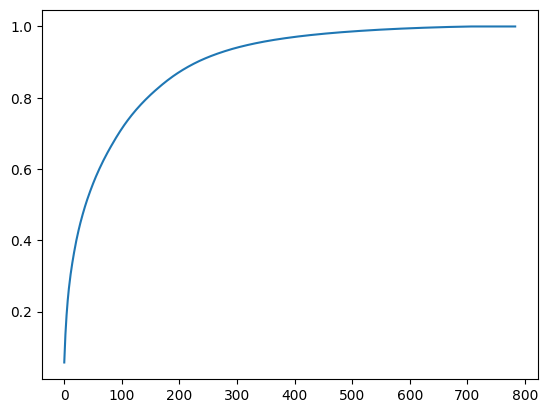

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))